In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from scipy import stats
from scipy.stats import ttest_ind
import math

In [6]:
# Loading the data with error-checking:
def load_data(file_path, column_name='size'):
    """
    Load data from a CSV file and handle potential errors.

    :param file_path: Path to the CSV file.
    :param column_name: Name to be given to the column in the DataFrame.
    :return: DataFrame containing the loaded data.
    """
    try:
        data = pd.read_csv(file_path, header=None, names=[column_name])
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        sys.exit(1)
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        sys.exit(1)
    except pd.errors.ParserError:
        print(f"Error: Unable to parse file '{file_path}'. Ensure it is in the correct CSV format.")
        sys.exit(1)
    return data

In [7]:
# Loading the data
data = load_data('items.csv', column_name='size')

In [8]:
# Converting the data to a list
items = data['size'].tolist()

In [9]:
# The bin size in the problem 
bin_capacity = 100

# Simulated Annealing

In [50]:
def initial_solution(items, capacity):
    bins = []
    for item in items:
        placed = False
        for bin in bins:
            if sum(bin) + item <= capacity:
                bin.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

def cost(bins):
    return len(bins)  # The cost is the number of bins used

def get_neighbor(bins, items, capacity):
    new_bins = [bin[:] for bin in bins]  # Make a deep copy of the bins
    item_to_move = random.choice(items)
    origin_bin = next(bin for bin in new_bins if item_to_move in bin)
    origin_bin.remove(item_to_move)
    
    # Try to place in an existing bin or a new one
    placed = False
    random.shuffle(new_bins)  # Randomize bins order to avoid bias
    for bin in new_bins:
        if sum(bin) + item_to_move <= capacity:
            bin.append(item_to_move)
            placed = True
            break
    if not placed:
        new_bins.append([item_to_move])
    
    # Remove empty bins
    new_bins = [bin for bin in new_bins if bin]
    return new_bins

def simulated_annealing(items, capacity, initial_temp, final_temp, alpha):
    current_solution = initial_solution(items, capacity)
    current_cost = cost(current_solution)
    temperature = initial_temp
    
    while temperature > final_temp:
        new_solution = get_neighbor(current_solution, items, capacity)
        new_cost = cost(new_solution)
        cost_diff = new_cost - current_cost
        
        if cost_diff < 0 or random.uniform(0, 1) < math.exp(-cost_diff / temperature):
            current_solution = new_solution
            current_cost = new_cost
            
        temperature *= alpha
    
    return current_solution

# Example usage
capacity = 100
initial_temp = 1000
final_temp = 1
alpha = 0.95

solution = simulated_annealing(items, capacity, initial_temp, final_temp, alpha)
for bin in solution:
    print(bin)

[21.3, 44.5, 17.6, 16.6]
[29.2, 34.8, 23.0, 9.5, 2.4]
[45.4, 29.1, 21.1]
[42.3, 28.0, 29.0]
[40.5, 37.7, 20.7]
[26.1, 47.2, 25.2]
[29.5, 46.1, 19.9]
[49.4, 17.0, 29.9]
[44.1, 48.0, 7.9]
[29.6, 11.4, 17.0, 1.5, 40.5]
[43.2, 30.6, 23.2]
[44.7, 9.9, 5.5, 39.6]
[45.4, 43.4, 8.7]
[24.7, 18.6, 21.8, 33.3]
[37.8, 14.9, 4.1, 42.7]
[38.8, 19.8, 20.7, 18.4]
[16.5, 40.5, 12.4, 29.9]
[17.6, 34.6, 19.0, 17.1, 10.5]
[35.1, 38.9, 5.9, 19.8]
[18.5, 33.3, 27.8, 18.4]
[47.0, 42.2, 9.1]
[39.3, 33.1, 21.9, 5.6]
[41.3, 46.0, 9.1, 3.6]
[34.3, 34.1, 24.5, 6.8]
[35.7, 24.7, 29.7, 7.7]
[19.3, 35.3, 43.8, 1.5]
[39.9, 19.1, 24.1, 16.6]
[47.8, 49.3]
[16.9, 20.5, 36.1, 15.4, 9.3]
[19.5, 31.9, 30.7, 16.8]
[26.7, 18.2, 40.6, 13.4]
[27.5, 34.5, 13.9, 22.2]
[34.3, 11.6, 15.1, 36.0]
[46.6, 18.6, 13.5, 20.5]
[30.5, 12.2, 16.8, 37.1, 3.4]
[31.4, 30.7, 21.0, 16.1]
[49.6, 32.9, 16.7]
[36.2, 48.4, 14.2]
[35.8, 32.9, 26.2]
[27.0, 21.5, 28.8, 21.3]
[41.1, 22.6, 2.0, 5.8, 27.0]
[46.8, 38.3, 10.1, 4.3]
[46.4, 34.5, 10.7]
[37.8,

In [51]:
print(f"Number of bins used: {len(solution)}")

Number of bins used: 262


# ACTOR CRITIC Reinforcement learning

In [56]:
# Helper function to initialize bins
def initialize_bins(items, bin_capacity):
    bins = []
    for item in items:
        placed = False
        for b in bins:
            if sum(b) + item <= bin_capacity:
                b.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

In [53]:
# Operators
def swap_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if bin1 and bin2:
        item1 = random.choice(bin1)
        item2 = random.choice(bin2)
        bin1.remove(item1)
        bin2.remove(item2)
        bin1.append(item2)
        bin2.append(item1)
    return bins

def move_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if bin1:
        item = random.choice(bin1)
        bin1.remove(item)
        if sum(bin2) + item <= bin_capacity:
            bin2.append(item)
    return bins

def repack_operator(bins, bin_capacity):
    if not bins:
        return bins
    item = random.choice([item for bin in bins for item in bin])
    for b in bins:
        if item in b:
            b.remove(item)
            break
    for b in bins:
        if sum(b) + item <= bin_capacity:
            b.append(item)
            return bins
    bins.append([item])
    return bins

def merge_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if sum(bin1) + sum(bin2) <= bin_capacity:
        bin1.extend(bin2)
        bins.remove(bin2)
    return bins

def split_operator(bins, bin_capacity):
    for b in bins:
        if len(b) > 1:
            item = random.choice(b)
            b.remove(item)
            bins.append([item])
            break
    return bins

# Simulated Annealing cooling schedule
def cooling_schedule(T, alpha):
    return alpha * T

# Actor-Critic model
class ActorCritic:
    def __init__(self, num_operators, learning_rate_actor=0.1, learning_rate_critic=0.1, discount_factor=0.99):
        self.num_operators = num_operators
        self.actor = np.ones(num_operators) / num_operators  # Softmax policy
        self.critic = {}
        self.alpha_actor = learning_rate_actor
        self.alpha_critic = learning_rate_critic
        self.gamma = discount_factor
    
    def choose_operator(self, state):
        prob_dist = self.actor
        action = np.random.choice(len(prob_dist), p=prob_dist)
        return action
    
    def update(self, state, action, reward, next_state):
        # Get or initialize state value
        if state not in self.critic:
            self.critic[state] = 0
        if next_state not in self.critic:
            self.critic[next_state] = 0
        
        # Temporal difference (TD) error
        td_error = reward + self.gamma * self.critic[next_state] - self.critic[state]
        
        # Update Critic
        self.critic[state] += self.alpha_critic * td_error
        
        # Update Actor
        for i in range(self.num_operators):
            if i == action:
                self.actor[i] += self.alpha_actor * td_error * (1 - self.actor[i])
            else:
                self.actor[i] -= self.alpha_actor * td_error * self.actor[i]
        
        # Normalize actor probabilities (softmax-like)
        self.actor = np.clip(self.actor, 0, 1)
        self.actor /= np.sum(self.actor)



def simulated_annealing_actor_critic(items, bin_capacity=100, max_iterations=1000, initial_temp=100, cooling_alpha=0.99):
    # Initialize the solution using FFD
    current_bins = initialize_bins(sorted(items, reverse=True), bin_capacity)
    num_bins = len(current_bins)
    
    # Define available operators
    operators = [swap_operator, move_operator, repack_operator, merge_operator, split_operator]
    actor_critic = ActorCritic(num_operators=len(operators))
    
    T = initial_temp
    best_solution = current_bins
    best_num_bins = num_bins

    # List to log the number of bins used in each iteration
    bins_per_iteration = []

    for iteration in range(max_iterations):
        # Get current state (number of bins and load per bin)
        state = tuple(sorted([sum(b) for b in current_bins]))
        
        # Select operator based on Actor-Critic policy
        operator_idx = actor_critic.choose_operator(state)
        operator = operators[operator_idx]
        
        # Apply selected operator, passing bin_capacity where required
        new_bins = operator([b.copy() for b in current_bins], bin_capacity)
        new_bins = [b for b in new_bins if b]  # Remove empty bins
        
        # Evaluate new solution
        new_num_bins = len(new_bins)
        reward = num_bins - new_num_bins  # Reward is reduction in number of bins

        # Log the number of bins used in this iteration
        bins_per_iteration.append(new_num_bins)
        
        # Print the current iteration and number of bins
        print(f"Iteration {iteration + 1}: Number of bins = {new_num_bins}")
        
        # Acceptance criterion (Simulated Annealing)
        if reward > 0 or math.exp(reward / T) > random.random():
            current_bins = new_bins
            num_bins = new_num_bins
            if new_num_bins < best_num_bins:
                best_solution = new_bins
                best_num_bins = new_num_bins
        
        # Get new state after applying the operator
        next_state = tuple(sorted([sum(b) for b in current_bins]))
        
        # Update Actor-Critic model
        actor_critic.update(state, operator_idx, reward, next_state)
        
        # Cooling
        T = cooling_schedule(T, cooling_alpha)

    return best_solution, bins_per_iteration


best_solution, bins_per_iteration = simulated_annealing_actor_critic(items)
# Display the final solution
print(f"\nBest number of bins: {len(best_solution)}")
for i, b in enumerate(best_solution):
    print(f"Bin {i+1}: {b} with total weight {sum(b)}")

Iteration 1: Number of bins = 259
Iteration 2: Number of bins = 259
Iteration 3: Number of bins = 260
Iteration 4: Number of bins = 260
Iteration 5: Number of bins = 260
Iteration 6: Number of bins = 260
Iteration 7: Number of bins = 260
Iteration 8: Number of bins = 260
Iteration 9: Number of bins = 260
Iteration 10: Number of bins = 260
Iteration 11: Number of bins = 261
Iteration 12: Number of bins = 261
Iteration 13: Number of bins = 261
Iteration 14: Number of bins = 261
Iteration 15: Number of bins = 261
Iteration 16: Number of bins = 261
Iteration 17: Number of bins = 261
Iteration 18: Number of bins = 261
Iteration 19: Number of bins = 261
Iteration 20: Number of bins = 261
Iteration 21: Number of bins = 261
Iteration 22: Number of bins = 261
Iteration 23: Number of bins = 261
Iteration 24: Number of bins = 261
Iteration 25: Number of bins = 261
Iteration 26: Number of bins = 261
Iteration 27: Number of bins = 261
Iteration 28: Number of bins = 261
Iteration 29: Number of bins 

# Comparing convergence between the two algorithm 

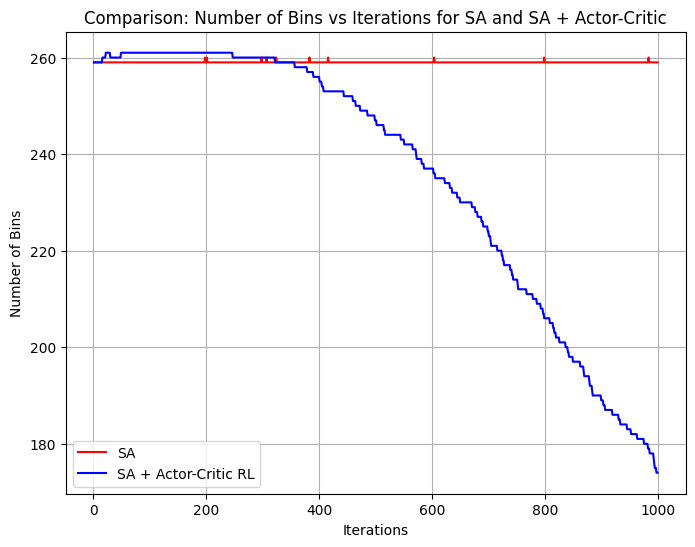

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Helper function to initialize bins
def initialize_bins(items, bin_capacity):
    bins = []
    for item in items:
        placed = False
        for b in bins:
            if sum(b) + item <= bin_capacity:
                b.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

# Operators
def swap_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if bin1 and bin2:
        item1 = random.choice(bin1)
        item2 = random.choice(bin2)
        bin1.remove(item1)
        bin2.remove(item2)
        bin1.append(item2)
        bin2.append(item1)
    return bins

def move_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if bin1:
        item = random.choice(bin1)
        bin1.remove(item)
        if sum(bin2) + item <= bin_capacity:
            bin2.append(item)
    return bins

def repack_operator(bins, bin_capacity):
    if not bins:
        return bins
    item = random.choice([item for bin in bins for item in bin])
    for b in bins:
        if item in b:
            b.remove(item)
            break
    for b in bins:
        if sum(b) + item <= bin_capacity:
            b.append(item)
            return bins
    bins.append([item])
    return bins

def merge_operator(bins, bin_capacity):
    if len(bins) < 2:
        return bins
    bin1, bin2 = random.sample(bins, 2)
    if sum(bin1) + sum(bin2) <= bin_capacity:
        bin1.extend(bin2)
        bins.remove(bin2)
    return bins

def split_operator(bins, bin_capacity):
    for b in bins:
        if len(b) > 1:
            item = random.choice(b)
            b.remove(item)
            bins.append([item])
            break
    return bins

# Simulated Annealing cooling schedule
def cooling_schedule(T, alpha):
    return alpha * T

# Actor-Critic model (simplified for example)
class ActorCritic:
    def __init__(self, num_operators, learning_rate_actor=0.1, learning_rate_critic=0.1, discount_factor=0.99):
        self.num_operators = num_operators
        self.actor = np.ones(num_operators) / num_operators  # Softmax policy
        self.critic = {}
        self.alpha_actor = learning_rate_actor
        self.alpha_critic = learning_rate_critic
        self.gamma = discount_factor
    
    def choose_operator(self, state):
        prob_dist = self.actor
        action = np.random.choice(len(prob_dist), p=prob_dist)
        return action
    
    def update(self, state, action, reward, next_state):
        # Get or initialize state value
        if state not in self.critic:
            self.critic[state] = 0
        if next_state not in self.critic:
            self.critic[next_state] = 0
        
        # Temporal difference (TD) error
        td_error = reward + self.gamma * self.critic[next_state] - self.critic[state]
        
        # Update Critic
        self.critic[state] += self.alpha_critic * td_error
        
        # Update Actor
        for i in range(self.num_operators):
            if i == action:
                self.actor[i] += self.alpha_actor * td_error * (1 - self.actor[i])
            else:
                self.actor[i] -= self.alpha_actor * td_error * self.actor[i]
        
        # Normalize actor probabilities (softmax-like)
        self.actor = np.clip(self.actor, 0, 1)
        self.actor /= np.sum(self.actor)

# Simulated Annealing with Actor-Critic
def simulated_annealing_actor_critic(items, bin_capacity=100, max_iterations=1000, initial_temp=100, cooling_alpha=0.99):
    current_bins = initialize_bins(sorted(items, reverse=True), bin_capacity)
    num_bins = len(current_bins)
    
    operators = [swap_operator, move_operator, repack_operator, merge_operator, split_operator]
    actor_critic = ActorCritic(num_operators=len(operators))
    
    T = initial_temp
    best_solution = current_bins
    best_num_bins = num_bins

    bins_per_iteration = []

    for iteration in range(max_iterations):
        state = tuple(sorted([sum(b) for b in current_bins]))
        operator_idx = actor_critic.choose_operator(state)
        operator = operators[operator_idx]
        
        new_bins = operator([b.copy() for b in current_bins], bin_capacity)
        new_bins = [b for b in new_bins if b]
        
        new_num_bins = len(new_bins)
        reward = num_bins - new_num_bins
        
        bins_per_iteration.append(new_num_bins)
        
        if reward > 0 or math.exp(reward / T) > random.random():
            current_bins = new_bins
            num_bins = new_num_bins
            if new_num_bins < best_num_bins:
                best_solution = new_bins
                best_num_bins = new_num_bins
        
        next_state = tuple(sorted([sum(b) for b in current_bins]))
        actor_critic.update(state, operator_idx, reward, next_state)
        
        T = cooling_schedule(T, cooling_alpha)

    return best_solution, bins_per_iteration

# Standard Simulated Annealing without Actor-Critic
def simulated_annealing(items, bin_capacity=100, max_iterations=1000, initial_temp=1000, cooling_alpha=0.95):
    current_bins = initialize_bins(sorted(items, reverse=True), bin_capacity)
    num_bins = len(current_bins)
    
    T = initial_temp
    best_solution = current_bins
    best_num_bins = num_bins

    bins_per_iteration = []

    for iteration in range(max_iterations):
        new_bins = repack_operator([b.copy() for b in current_bins], bin_capacity)
        new_bins = [b for b in new_bins if b]  # Remove empty bins
        
        new_num_bins = len(new_bins)
        reward = num_bins - new_num_bins
        
        bins_per_iteration.append(new_num_bins)
        
        if reward > 0 or math.exp(reward / T) > random.random():
            current_bins = new_bins
            num_bins = new_num_bins
            if new_num_bins < best_num_bins:
                best_solution = new_bins
                best_num_bins = new_num_bins
        
        T = cooling_schedule(T, cooling_alpha)

    return best_solution, bins_per_iteration

best_solution_ac, bins_per_iteration_ac = simulated_annealing_actor_critic(items, bin_capacity=100, max_iterations=1000, initial_temp=1000, cooling_alpha=0.95)
best_solution_sa, bins_per_iteration_sa = simulated_annealing(items, bin_capacity=100, max_iterations=1000, initial_temp=1000, cooling_alpha=0.95)

# Plotting the number of bins vs iterations for both algorithms
plt.figure(figsize=(8,6))
plt.plot(range(1, len(bins_per_iteration_sa) + 1), bins_per_iteration_sa, label="SA", color='red')
plt.plot(range(1, len(bins_per_iteration_ac) + 1), bins_per_iteration_ac, label="SA + Actor-Critic RL", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Number of Bins")
plt.title("Comparison: Number of Bins vs Iterations for SA and SA + Actor-Critic")
plt.grid(True)
plt.legend()
plt.show()


# Reward Function with Iterations

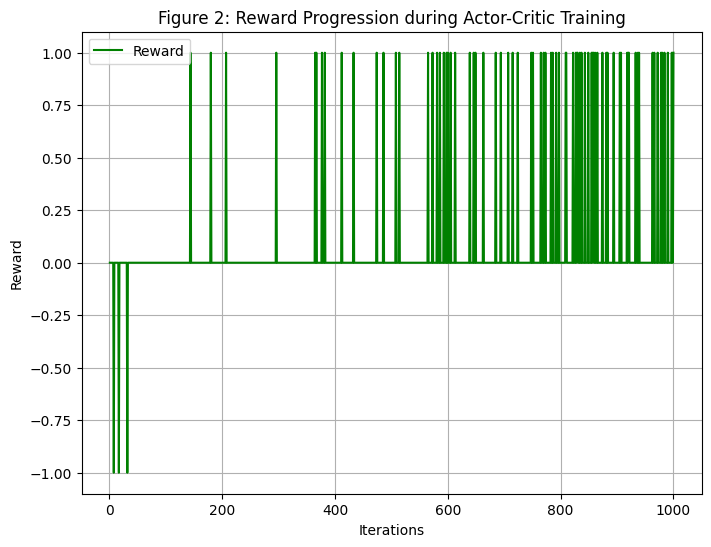

In [38]:
# Since we are tracking rewards in Actor-Critic, we can extract them for plotting.

# Modify the Actor-Critic model to track rewards (this is for visualization purposes)
class ActorCriticWithRewardTracking(ActorCritic):
    def __init__(self, num_operators, learning_rate_actor=0.1, learning_rate_critic=0.1, discount_factor=0.99):
        super().__init__(num_operators, learning_rate_actor, learning_rate_critic, discount_factor)
        self.rewards = []  # To track the reward progression during training

    def update(self, state, action, reward, next_state):
        super().update(state, action, reward, next_state)
        self.rewards.append(reward)  # Log the reward after each update

# Run the simulated annealing with Actor-Critic and track reward progression
def simulated_annealing_actor_critic_with_rewards(items, bin_capacity=100, max_iterations=1000, initial_temp=100, cooling_alpha=0.99):
    current_bins = initialize_bins(sorted(items, reverse=True), bin_capacity)
    num_bins = len(current_bins)
    
    operators = [swap_operator, move_operator, repack_operator, merge_operator, split_operator]
    actor_critic = ActorCriticWithRewardTracking(num_operators=len(operators))
    
    T = initial_temp
    best_solution = current_bins
    best_num_bins = num_bins

    bins_per_iteration = []

    for iteration in range(max_iterations):
        state = tuple(sorted([sum(b) for b in current_bins]))
        operator_idx = actor_critic.choose_operator(state)
        operator = operators[operator_idx]
        
        new_bins = operator([b.copy() for b in current_bins], bin_capacity)
        new_bins = [b for b in new_bins if b]
        
        new_num_bins = len(new_bins)
        reward = num_bins - new_num_bins
        
        bins_per_iteration.append(new_num_bins)
        
        if reward > 0 or math.exp(reward / T) > random.random():
            current_bins = new_bins
            num_bins = new_num_bins
            if new_num_bins < best_num_bins:
                best_solution = new_bins
                best_num_bins = new_num_bins
        
        next_state = tuple(sorted([sum(b) for b in current_bins]))
        actor_critic.update(state, operator_idx, reward, next_state)
        
        T = cooling_schedule(T, cooling_alpha)

    return best_solution, bins_per_iteration, actor_critic.rewards

# Run the Actor-Critic enhanced SA with reward tracking
_, _, reward_progression = simulated_annealing_actor_critic_with_rewards(items, bin_capacity=100, max_iterations=1000, initial_temp=1000, cooling_alpha=0.95)

# Plotting reward progression during Actor-Critic training
plt.figure(figsize=(8,6))
plt.plot(range(1, len(reward_progression) + 1), reward_progression, label="Reward", color='green')
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.title("Figure 2: Reward Progression during Actor-Critic Training")
plt.grid(True)
plt.legend()
plt.show()

# Tracking how operators are being selected over iterations

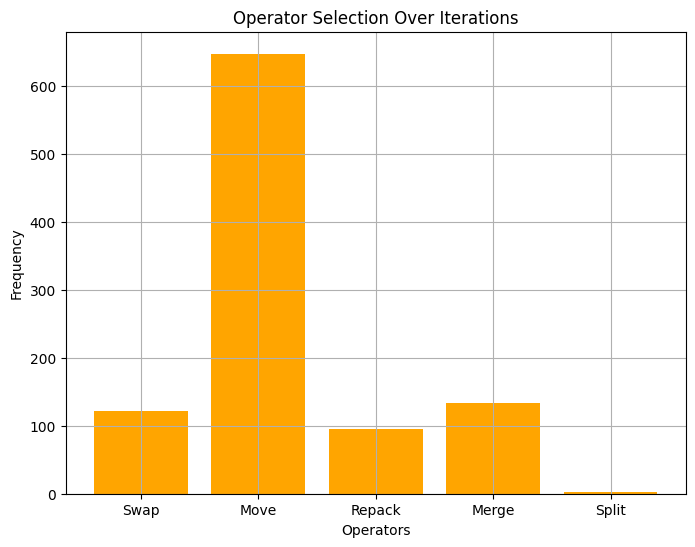

In [42]:
# Actor-Critic model with tracking
class ActorCriticWithOperatorTracking:
    def __init__(self, num_operators, learning_rate_actor=0.1, learning_rate_critic=0.1, discount_factor=0.99):
        self.num_operators = num_operators
        self.actor = np.ones(num_operators) / num_operators  # Softmax policy
        self.critic = {}
        self.alpha_actor = learning_rate_actor
        self.alpha_critic = learning_rate_critic
        self.gamma = discount_factor
        self.operator_choices = []  # To track the operator choices during training
        self.rewards = []  # To track the reward progression during training

    def choose_operator(self, state):
        prob_dist = self.actor
        action = np.random.choice(len(prob_dist), p=prob_dist)
        self.operator_choices.append(action)  # Log the chosen operator
        return action

    def update(self, state, action, reward, next_state):
        # Get or initialize state value
        if state not in self.critic:
            self.critic[state] = 0
        if next_state not in self.critic:
            self.critic[next_state] = 0
        
        # Temporal difference (TD) error
        td_error = reward + self.gamma * self.critic[next_state] - self.critic[state]
        
        # Update Critic
        self.critic[state] += self.alpha_critic * td_error
        
        # Update Actor
        for i in range(self.num_operators):
            if i == action:
                self.actor[i] += self.alpha_actor * td_error * (1 - self.actor[i])
            else:
                self.actor[i] -= self.alpha_actor * td_error * self.actor[i]
        
        # Normalize actor probabilities (softmax-like)
        self.actor = np.clip(self.actor, 0, 1)
        self.actor /= np.sum(self.actor)

        self.rewards.append(reward)  # Log the reward after each update

# Rewriting Simulated Annealing with Actor-Critic and operator tracking
def simulated_annealing_actor_critic_with_operator_tracking(items, bin_capacity=100, max_iterations=1000, initial_temp=100, cooling_alpha=0.99):
    current_bins = initialize_bins(sorted(items, reverse=True), bin_capacity)
    num_bins = len(current_bins)
    
    operators = [swap_operator, move_operator, repack_operator, merge_operator, split_operator]
    actor_critic = ActorCriticWithOperatorTracking(num_operators=len(operators))
    
    T = initial_temp
    best_solution = current_bins
    best_num_bins = num_bins

    bins_per_iteration = []

    for iteration in range(max_iterations):
        state = tuple(sorted([sum(b) for b in current_bins]))
        operator_idx = actor_critic.choose_operator(state)
        operator = operators[operator_idx]
        
        new_bins = operator([b.copy() for b in current_bins], bin_capacity)
        new_bins = [b for b in new_bins if b]
        
        new_num_bins = len(new_bins)
        reward = num_bins - new_num_bins
        
        bins_per_iteration.append(new_num_bins)
        
        if reward > 0 or math.exp(reward / T) > random.random():
            current_bins = new_bins
            num_bins = new_num_bins
            if new_num_bins < best_num_bins:
                best_solution = new_bins
                best_num_bins = new_num_bins
        
        next_state = tuple(sorted([sum(b) for b in current_bins]))
        actor_critic.update(state, operator_idx, reward, next_state)
        
        T = cooling_schedule(T, cooling_alpha)

    return best_solution, bins_per_iteration, actor_critic.rewards, actor_critic.operator_choices


_, _, _, operator_choices = simulated_annealing_actor_critic_with_operator_tracking(items, bin_capacity=100, max_iterations=1000, initial_temp=1000, cooling_alpha=0.95)

# Plotting operator selections over iterations
plt.figure(figsize=(8,6))
plt.hist(operator_choices, bins=np.arange(0, 6) - 0.5, rwidth=0.8, align='mid', color='orange')
plt.xticks(ticks=np.arange(5), labels=['Swap', 'Move', 'Repack', 'Merge', 'Split'])
plt.xlabel("Operators")
plt.ylabel("Frequency")
plt.title("Operator Selection Over Iterations")
plt.grid(True)
plt.show()